## 1.2 Importing Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
SP500 = pd.read_csv("/Users/rev.dr.sylviablessings/Downloads/sp500_companies.csv")

In [3]:
SP500.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810


## 1.3 Data Preprocessing
Check for missing values; replace or remove them

In [4]:
SP500.isnull().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 30
Revenuegrowth           1
City                    0
State                  19
Country                 0
Fulltimeemployees       2
Longbusinesssummary     0
Weight                  0
dtype: int64

In [6]:
SP500[SP500['Revenuegrowth'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
52,NYQ,CVS,CVS Health Corporation,CVS Health Corporation,Healthcare,Healthcare Plans,95.31,125814915072,1.828900e+10,NaN,Woonsocket,RI,United States,216000.0,CVS Health Corporation provides health service...,0.003973


## Function to Remove Null Values

In [5]:
def replaceNull(df, symbol, column, missing):
    ticker = yf.Ticker(symbol)
    df.loc[df['Symbol']==symbol, column] = ticker.info[missing]

In [9]:
SP500['Revenuegrowth'].dropna()

0       0.086
1       0.184
2       0.805
3       0.115
4       0.142
        ...  
488     0.531
489     0.130
490     0.741
491    49.886
492     0.163
Name: Revenuegrowth, Length: 492, dtype: float64

In [13]:
SP500.dropna(inplace=True)

In [14]:
SP500.isnull().sum()

Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

In [15]:
SP500

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,NMS,PENN,"Penn National Gaming, Inc.","Penn National Gaming, Inc.",Consumer Cyclical,Resorts & Casinos,32.81,5561754624,1.450800e+09,0.531,Wyomissing,PA,United States,21973.0,"Penn National Gaming, Inc., together with its ...",0.000176
489,NYQ,VNO,Vornado Realty Trust,Vornado Realty Trust,Real Estate,REIT—Office,28.89,5537663488,7.640420e+08,0.130,New York,NY,United States,3224.0,Vornado's portfolio is concentrated in the nat...,0.000175
490,NYQ,ALK,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Industrials,Airlines,42.40,5374624256,8.790000e+08,0.741,Seattle,WA,United States,22092.0,"Alaska Air Group, Inc., through its subsidiari...",0.000170
491,NYQ,NCLH,Norwegian Cruise Line Holdings,Norwegian Cruise Line Holdings Ltd.,Consumer Cyclical,Travel Services,11.18,4660852736,-1.794137e+09,49.886,Miami,FL,United States,34700.0,"Norwegian Cruise Line Holdings Ltd., together ...",0.000147


## Exploratory Data Analysis

<Figure size 1500x1200 with 0 Axes>

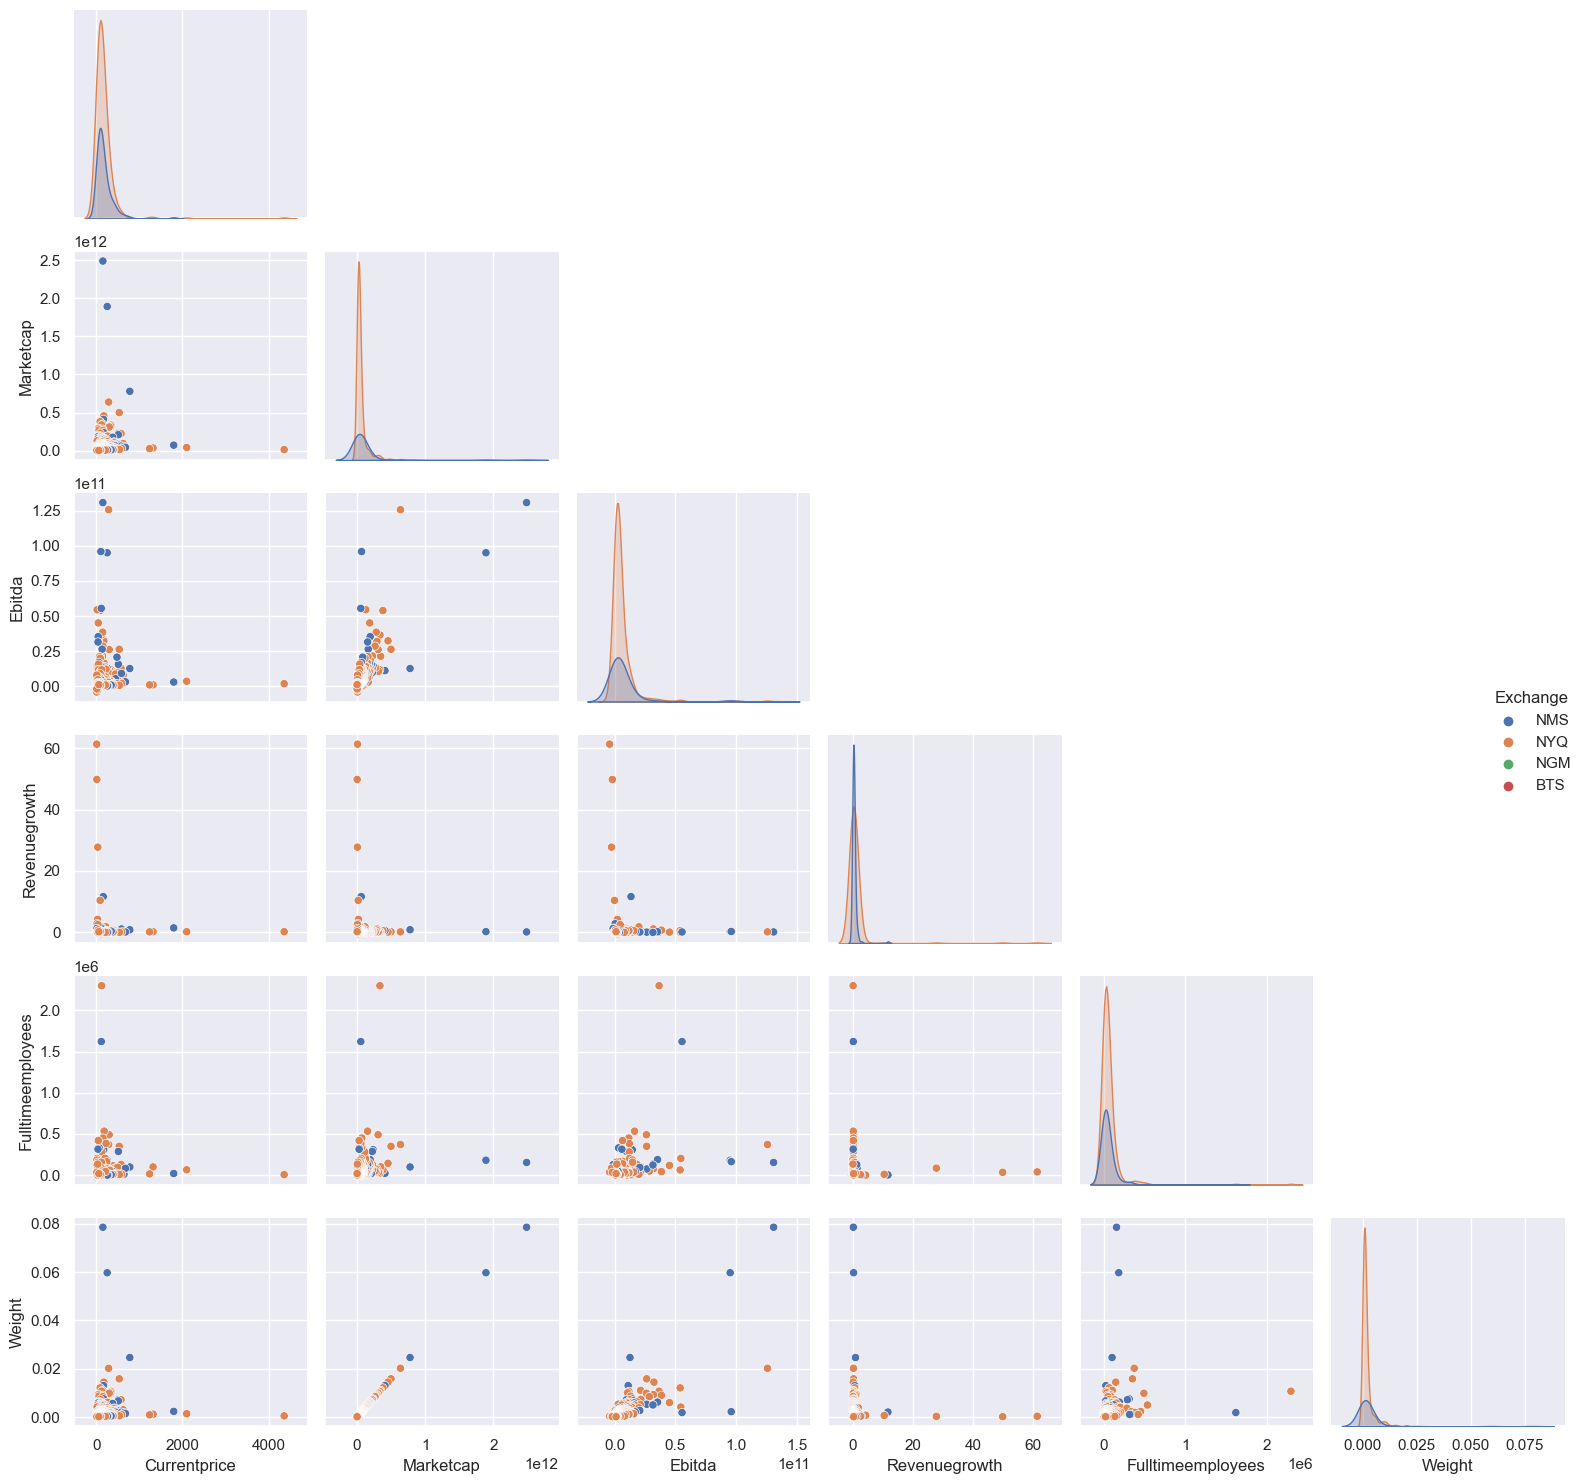

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,12))
sns.pairplot(SP500, corner=True, hue='Exchange')
plt.tight_layout()

## Correlation Heatmap

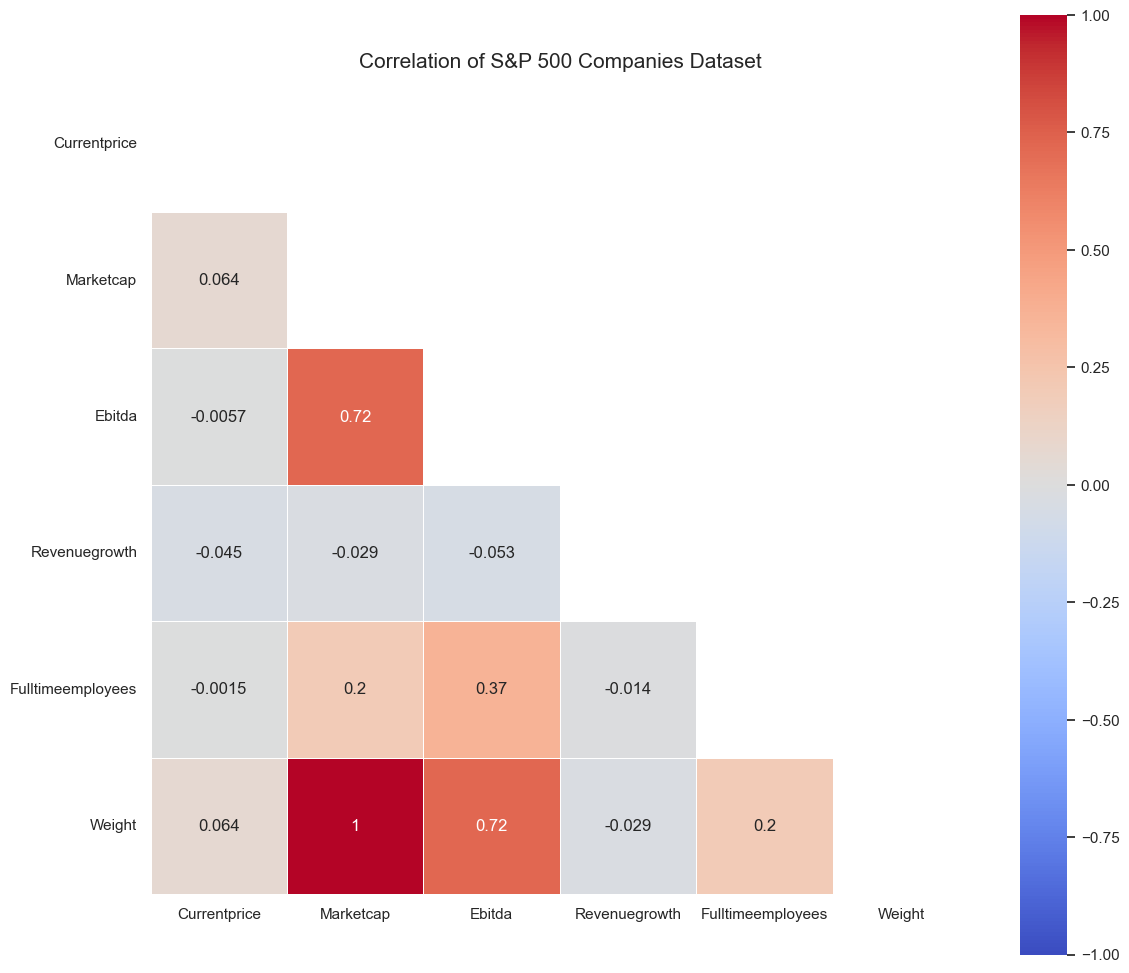

In [18]:
correlation = SP500.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(correlation, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True,
               cmap='coolwarm', annot=True)
    plt.title('Correlation of S&P 500 Companies Dataset', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

## Top Sector in S&P 500

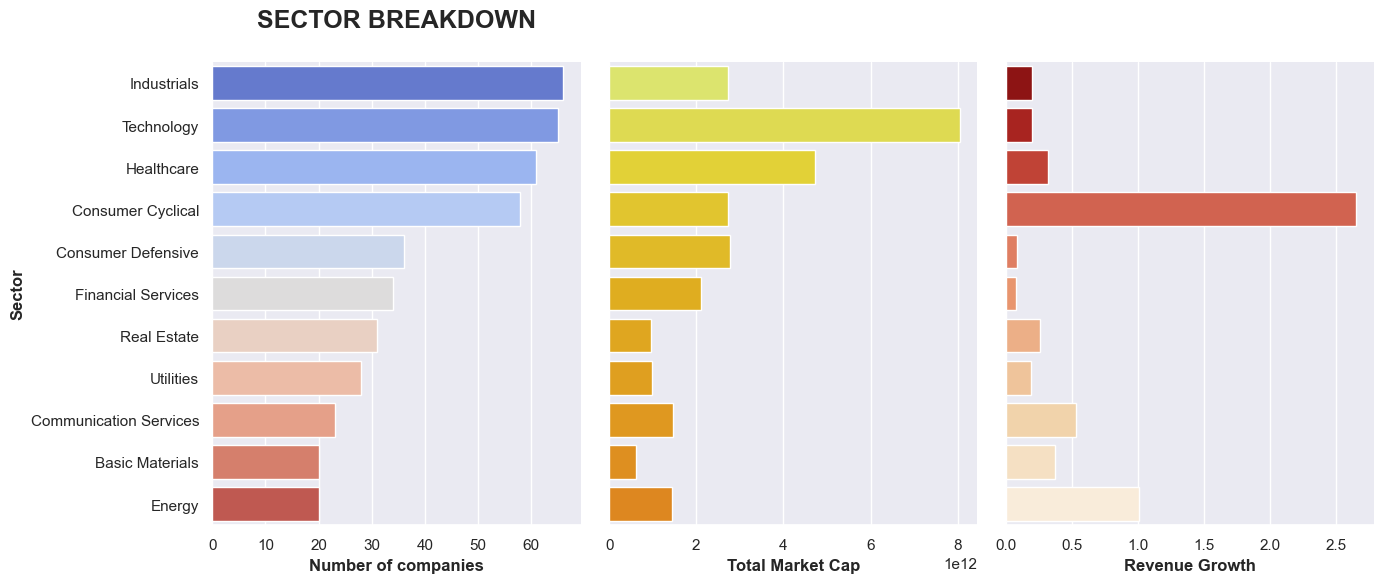

In [19]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = SP500.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout()

## Top 10 Stocks
#### - Filtered by market cap, EBITDA, & Full Time Employee Comparison

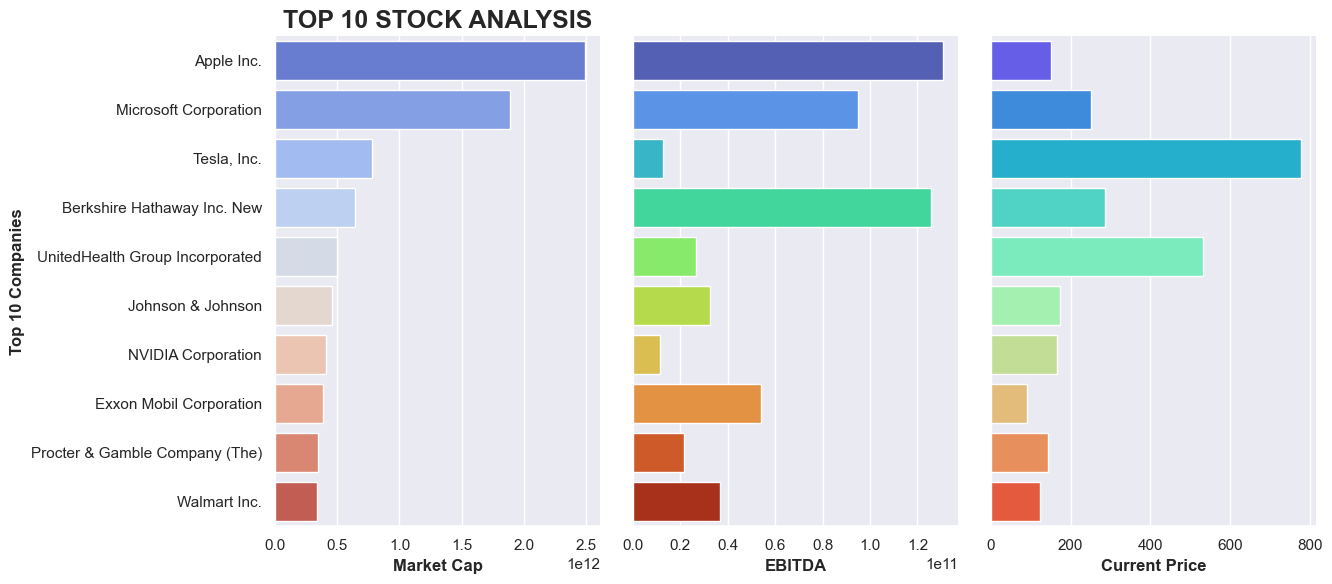

In [22]:
N = 10
fig2 = plt.figure(num=None, figsize=(17, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 4, 1)
ax1 = sns.barplot(x=SP500.iloc[:N,7], y=SP500.iloc[:N,2], data=SP500, palette=('coolwarm'))
ax1.set_xlabel('Market Cap', weight='bold')
ax1.set_ylabel(f'Top {N} Companies', weight = 'bold')
ax1.set_title(f'TOP {N} STOCK ANALYSIS', weight='bold').set_fontsize('18')

plt.subplot(1, 4, 2)
ax2 = sns.barplot(x=SP500.iloc[:N,8], y=SP500.iloc[:N,2], data=SP500, palette=('turbo'))
ax2.set_xlabel('EBITDA', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 3)
ax2 = sns.barplot(x=SP500.iloc[:N,6], y=SP500.iloc[:N,2], data=SP500, palette=('rainbow'))
ax2.set_xlabel('Current Price', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])


sns.despine()
plt.tight_layout()

In [23]:
SP500.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810
